# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

**Dataset Overview**
- ID = Customer's id
- Year_Birth = Customer's year of birth
- Education = Customer’s level of education
- Marital_Status = Customer’s marital status
- Income = Customer’s yearly household income
- Kidhome = Number of small children in customer’s household
- Teenhome = Number of teenagers in customer’s household
- Dt_Customer = Date of customer’s enrolment with the company
- Recency = Number of days since the last purchase
- MntWines = Amount spent on wine products in the last 2 years
- MntFruits = Amount spent on fruits products in the last 2 years
- MntMeatProducts = Amount spent on meat products in the last 2 years
- MntFishProducts = Amount spent on fish products in the last 2 years
- MntSweetProducts = Amount spent on sweet products in the last 2 years
- MntGoldProds = Amount spent on gold products in the last 2 years
- NumDealsPurchases = Number of purchases made with discount
- NumWebPurchases = Number of purchases made through company’s web site
- NumCatalogPurchases = Number of purchases made using catalogue
- NumStorePurchases = Number of purchases made directly in stores
- NumWebVisitsMonth = Number of purchases made through company’s web site
- AcceptedCmp3 = 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 = 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 = 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1 = 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 = 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Complain = 1 if customer complained in the last 2 years
- Z_CostContact = Cost to contact a customer
- Z_Revenue = Revenue after client accepting campaign
- Response =1 if customer accepted the offer in the last campaign, 0 otherwise


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('marketing_campaign_data.csv').drop(['Unnamed: 0'], axis=1)
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Jumlah Data Duplikat

In [5]:
df.duplicated().sum()

0

Jumlah Null

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].max())
print(df['Dt_Customer'].min())

2014-12-06 00:00:00
2012-01-08 00:00:00


# Feature Engineering 

**Extract Age**

In [8]:
df['Age'] = 2014 - df['Year_Birth']

In [9]:
df.Age.describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [10]:
def Age_category(data):
    if data < 24:
        return 'Pelajar(<24)'
    elif data <= 55:
        return 'Produktif(24-55)'
    elif data <= 75:
        return 'Lansia(56-75)'
    else:
        return 'Manula(>65)'
    
cat_age = df['Age'].apply(lambda data: Age_category(data))
df['Age_category'] = cat_age
df[['Year_Birth','Age','Age_category']].sample(7,random_state=33)

,Year_Birth,Age,Age_category
453,1980,34,Produktif(24-55)
633,1960,54,Produktif(24-55)
302,1978,36,Produktif(24-55)
463,1963,51,Produktif(24-55)
1638,1969,45,Produktif(24-55)
634,1973,41,Produktif(24-55)
1552,1956,58,Lansia(56-75)


**Extract Population**

(Merupakan jumlah orang / populasi yang tinggal di rumah customer)

Jumlah Anak (Kidhome) + Jumlah (remaja) + 1 customer

In [11]:
df['Population'] = df['Kidhome'] + df['Teenhome'] + 1
df[['Kidhome','Teenhome','Population']].head()

,Kidhome,Teenhome,Population
0,0,0,1
1,1,1,3
2,0,0,1
3,1,0,2
4,1,0,2


**Total Pengeluaran**

In [12]:
df['Total_cost'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']	
df[['MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_cost']].head()

,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_cost
0,635000,88000,546000,172000,88000,88000,1617000
1,11000,1000,6000,2000,1000,6000,27000
2,426000,49000,127000,111000,21000,42000,776000
3,11000,4000,20000,10000,3000,5000,53000
4,173000,43000,118000,46000,27000,15000,422000


**Total Accept Campaign**

Merupakan total campaign yang diambil oleh customer selama join di perusahaan

In [13]:
from datetime import datetime
total_acc_campaign = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['Total_acc_campaign'] = total_acc_campaign

**Conversion Rate**
- conversion rate (berapa jumlah response dibandingkan total visit yang customer dilakukan di platform).
- `Conversion Rate = Total Purchases / Jumlah Visit Per Month`
- Terdapat nilai INF dan NaN. Dikarenakan terdapat nilai 0 pada penyebut(NumWebVisitsMonth). Sehingga jika NumWebVisitsMonth = 0, maka conversion rate akan otomatis di replace menjadi 0.

In [14]:
df['Conversion_rate'] =round(df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'] / df['NumWebVisitsMonth'],2)
df[['Conversion_rate']].describe()

,Conversion_rate
count,2237.00
mean,inf
std,NaN
min,0.00
25%,5.00
50%,11.00
75%,15.75
max,inf


In [15]:
print("Jumlah INF pada Conversion_rate : ",np.isinf(df['Conversion_rate']).sum())
print("Jumlah NaN pada Conversion_rate : ", df['Conversion_rate'].isna().sum())

Jumlah INF pada Conversion_rate :  8
Jumlah NaN pada Conversion_rate :  3


In [16]:
df['Conversion_rate'] = df['Conversion_rate'].fillna(0)
df['Conversion_rate'] = df['Conversion_rate'].replace([np.inf, -np.inf], 0)
df['Conversion_rate'].describe()

count    2240.000000
mean       10.801277
std         6.253869
min         0.000000
25%         4.950000
50%        10.830000
75%        15.620000
max        43.000000
Name: Conversion_rate, dtype: float64

Total Purchases

In [17]:
df['Total_purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebVisitsMonth']

In [18]:
df[['Conversion_rate','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Total_purchases']].head()

,Conversion_rate,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_purchases
0,21.57,3,8,10,4,7,32
1,4.40,2,1,1,2,5,11
2,13.50,1,8,2,10,4,25
3,4.67,2,2,0,4,6,14
4,14.20,5,5,3,6,5,24


# EDA

**1. Conversion Rate Terhadap Income**
- Tingkat Conversion rate setiap pelanggan biasanya dipengaruhi oleh jumlah income pelanggan tersebut. artinya terdapat korelasi positif, dimana semakin tinggi tingkat pendapatan pelanggan maka semakin tinggi tingkat conversion rate nya.
- Pelanggan dengan tingkat pendapatan yang tinggi cenderung memiliki kemampuan daya beli yang tinggi, sehingga direkomendasikan untuk memberikan campaign pada pelanggan dengan segmentasi income yang tinggi agar revenue dapat ditingkatkan dan dapat meng-efisiensikan cost.

(0.0, 180000000.0)

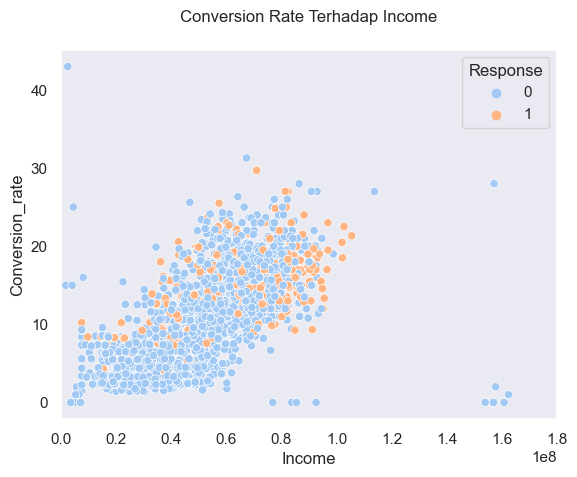

In [19]:
sns.set_theme(style='dark', palette='pastel')
sns.scatterplot(data=df, x='Income',y='Conversion_rate', hue='Response')
plt.title('Conversion Rate Terhadap Income', pad=20)
plt.xlim(0,180000000)

**2. Conversion Rate Terhadap Umur Customer**
- Data yang ditunjukkan pada scatter plot, menunjukkan bahwa mayoritas customer memiliki distribusi umur pada range 25 - 80 Tahun. Namun Umur tidak memiliki korelasi dengan tingkat conversion rate, yang artinya umur pelanggan tidak berpengaruh significant terhadap kemampuan daya beli.
- Jika melihat pada barplot, customer dengan kategori umur manula dan lansia memiliki rata rata conversion rate yang cukup tinggi namun tidak terlalu significant jika dibandingkan kategori umur pra lansia dan produktif. Penyebabnya mungkin dari beberapa faktor, diasumsikan kaum produktif & pra lansia cenderung lebih efisien dalam mengelola pengeluarannya, dan fokus bekerja dan memperbanyak Income untuk jaminan hari Tua.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Lansia(56-75)'),
  Text(1, 0, 'Produktif(24-55)'),
  Text(2, 0, 'Pelajar(<24)'),
  Text(3, 0, 'Manula(>65)')])

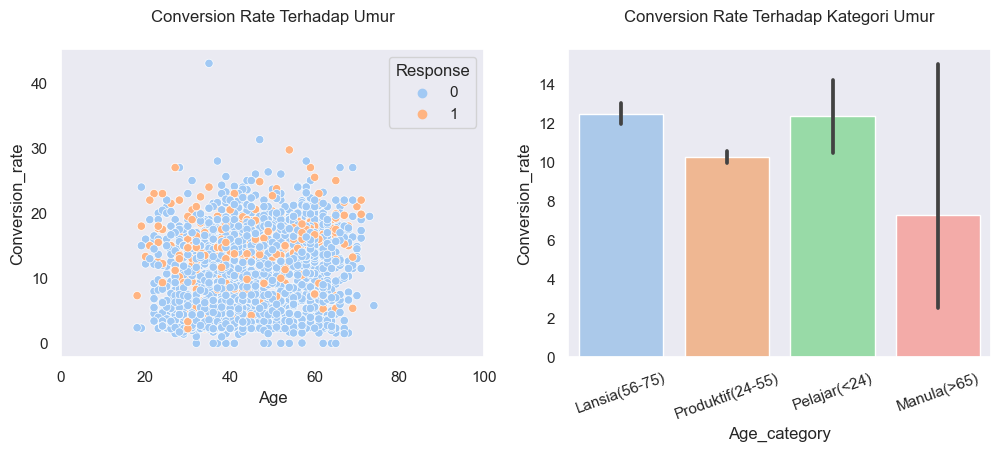

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Age',y='Conversion_rate', hue='Response')
plt.title('Conversion Rate Terhadap Umur', pad=20)
plt.xlim(0,100)

plt.subplot(1,2,2)
sns.barplot(data=df, x='Age_category', y='Conversion_rate', estimator=np.mean)
plt.title('Conversion Rate Terhadap Kategori Umur', pad=20)
plt.xticks(rotation=20)

**3. Tingkat Education Terhadap Total Campaign**

- Terlihat customer yang tingkat pendidikannya SMA memiliki rata rata accept campaign yang paling rendah, sedangkan customer dengan education S3 memiliki rata rata accept campaign terbesar. Faktor penyebabnya mungkin karena customer yang tingkat pendidikannya hanya mencapai SMA mempunyai kesulitan finansial dalam pekerjaannya, jika dibandingkan dengan customer dengan education S3 yang memiliki pekerjaan yang lebih baik sehingga income lebih besar. 

Text(0, 0.5, 'Avg Acc Campaign')

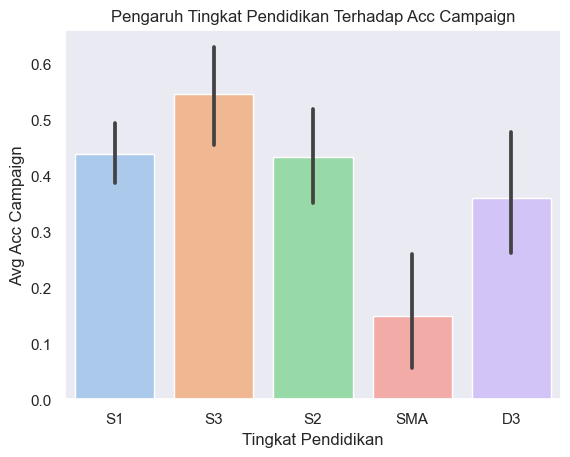

In [21]:
plt.title('Pengaruh Tingkat Pendidikan Terhadap Acc Campaign')
sns.barplot(data=df, x='Education', y='Total_acc_campaign')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Avg Acc Campaign')

**4. Distribusi Data**

(0.0, 200000000.0)

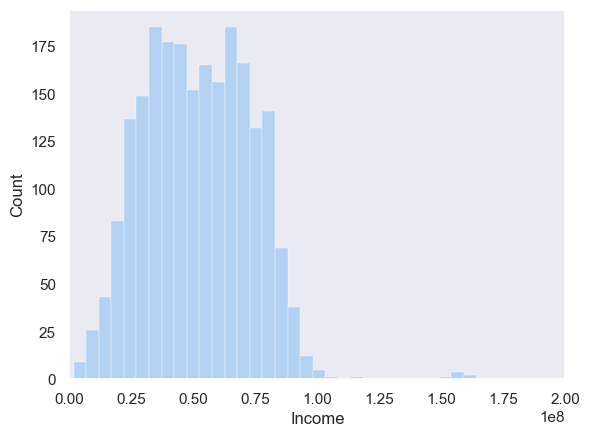

In [22]:
sns.histplot(data=df, x='Income')
plt.xlim(0,200000000)

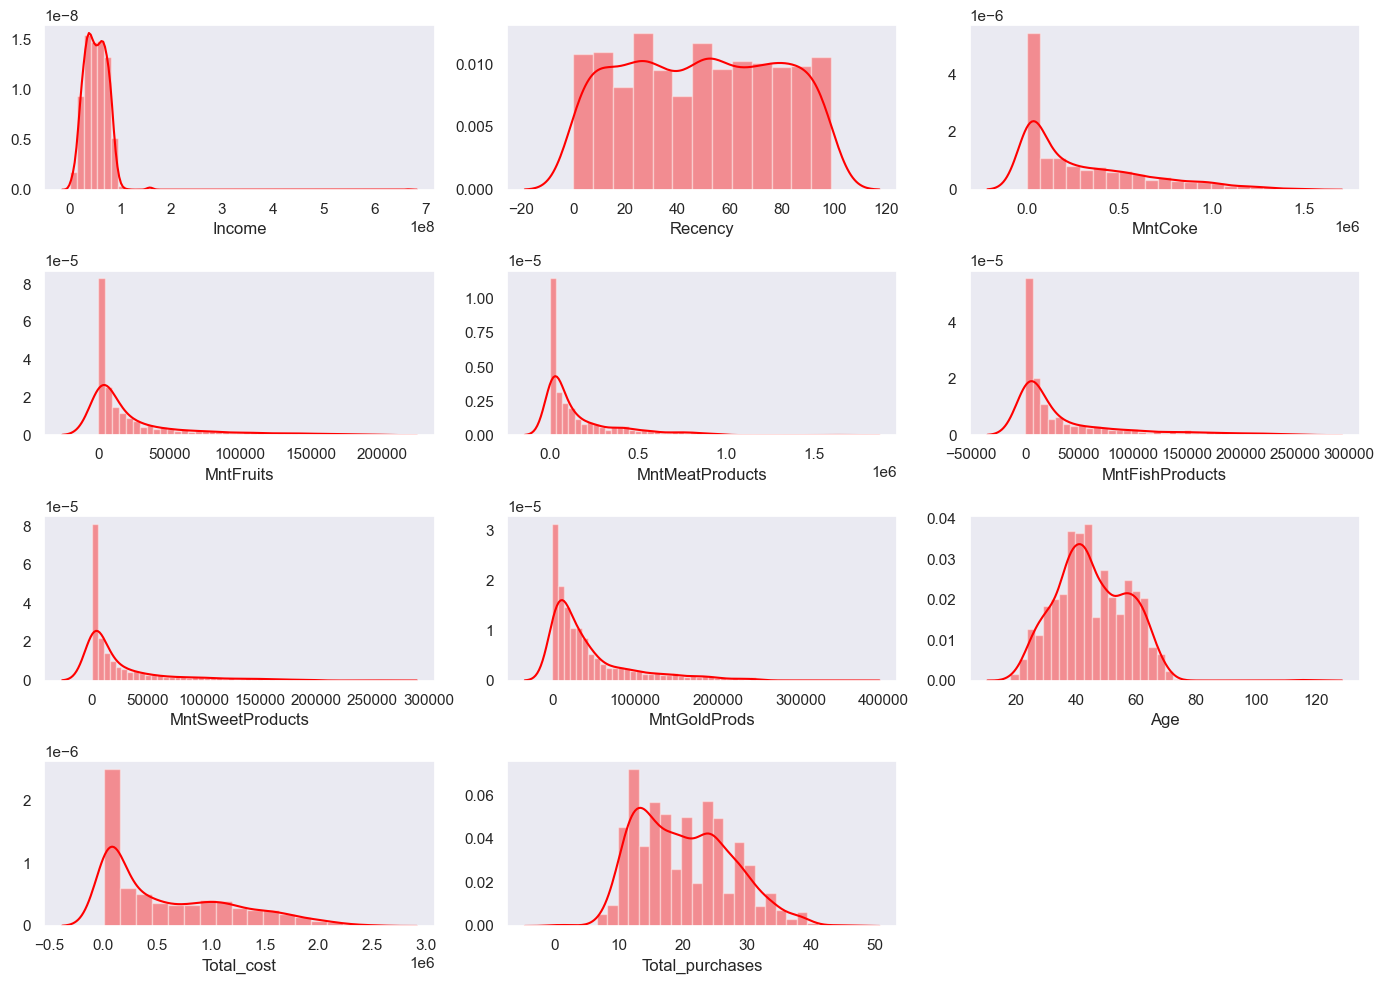

In [23]:
numeric = ['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds', 'Age', 'Total_cost', 'Total_purchases']
plt.figure(figsize=(14,10))
for i in range(len(numeric)):
    plt.subplot(4,3, i+1)
    sns.distplot(df[numeric[i]], color='Red')
    plt.ylabel('')
    plt.tight_layout()

# Preprocessing

## Cleaning Data

**Handling Missing Value**

- Terdapat 24 Missing Value Pada kolom Income.
- Terlepas adanya outlier, Kolom Income memiliki distribusi normal. Sehingga replace NaN dengan mean.

In [24]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Age_category            0
Population              0
Total_cost              0
Total_acc_campaign      0
Conversion_rate         0
Total_purchases         0
dtype: int64

In [25]:
print("Banyak Data Null Column Income",df['Income'].isna().sum())
print("Ratio Jumlah Null Terhadap Total Data : ", df['Income'].isna().sum() / len(df['Income'])*100)

Banyak Data Null Column Income 24
Ratio Jumlah Null Terhadap Total Data :  1.0714285714285714


24


<AxesSubplot:xlabel='Income'>

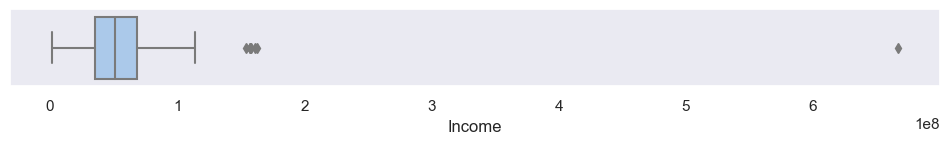

In [26]:
print(df['Income'].isna().sum())
plt.figure(figsize=(12,1))
sns.boxplot(data=df, x='Income')

In [27]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

**Handling Duplicated Value**

Data tidak memiliki nilai duplikat

In [28]:
print("Jumlah Data Duplikat : ",df.duplicated().sum())

Jumlah Data Duplikat :  0


**Handling Outlier**

In [29]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_category,Population,Total_cost,Total_acc_campaign,Conversion_rate,Total_purchases
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,Lansia(56-75),1,1617000,1,21.57,32
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,Lansia(56-75),3,27000,0,4.40,11
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,Produktif(24-55),1,776000,0,13.50,25
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,Produktif(24-55),2,53000,0,4.67,14
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,Produktif(24-55),2,422000,0,14.20,24


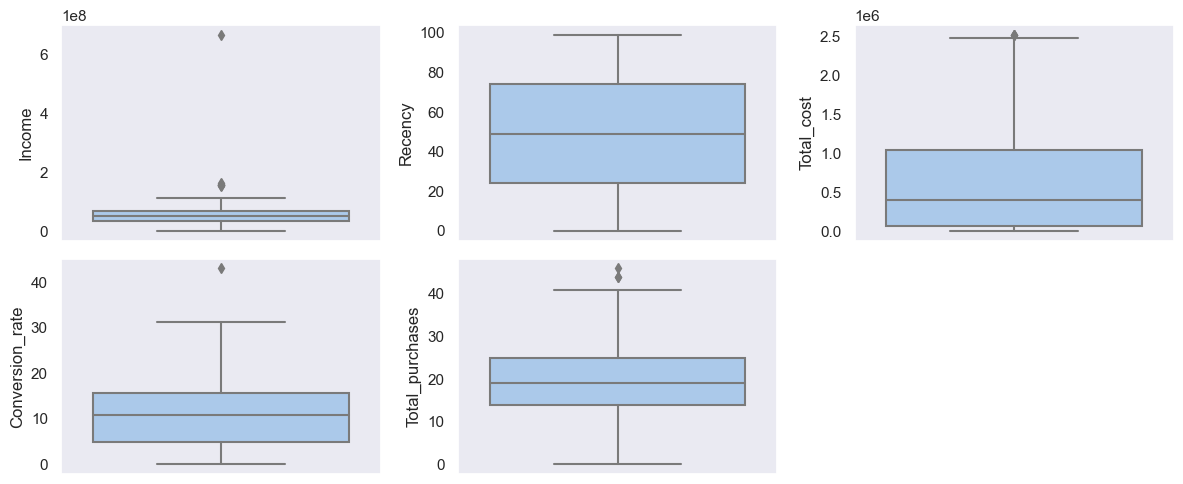

In [30]:
column = ['Income', 'Recency', 'Total_cost','Conversion_rate', 'Total_purchases']
plt.figure(figsize=(12,5))
for i in range(len(column)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=column[i])
    plt.tight_layout()

In [31]:
print('Jumlah Data sebelum Remove Outlier : ', df.shape)
column = ['Income', 'Recency', 'Total_cost','Conversion_rate', 'Total_purchases']
for i in column:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    low_limit = q1 - (1.5*iqr)
    high_limit = q3 + (1.5*iqr)
    df = df[ (df[i]>low_limit) & (df[i]<high_limit) ]
print('Jumlah Data setelah Remove Outlier : ', df.shape)


Jumlah Data sebelum Remove Outlier :  (2240, 36)
Jumlah Data setelah Remove Outlier :  (2227, 36)


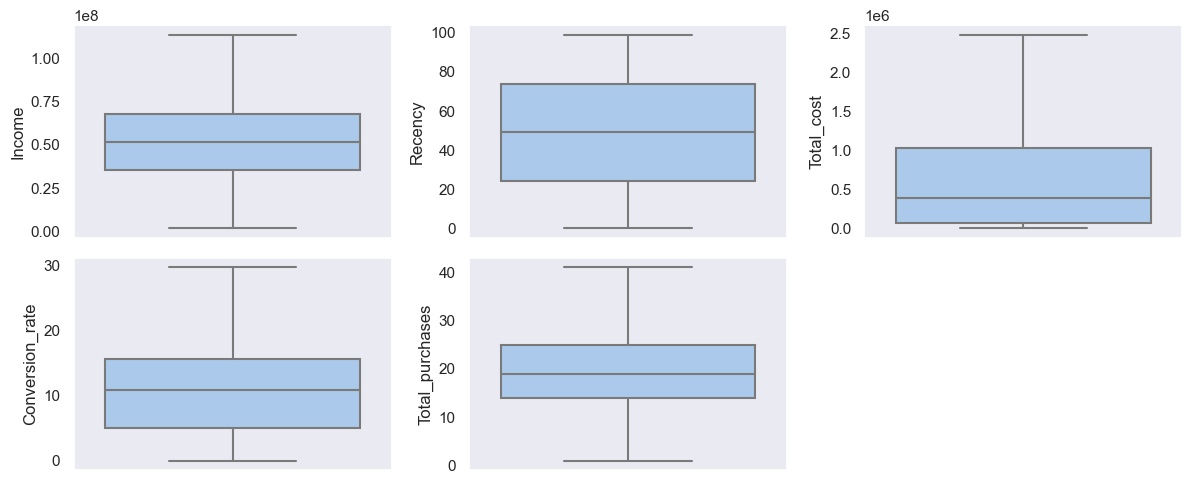

In [32]:
column = ['Income', 'Recency', 'Total_cost','Conversion_rate', 'Total_purchases']
plt.figure(figsize=(12,5))
for i in range(len(column)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=column[i])
    plt.tight_layout()

In [33]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_category,Population,Total_cost,Total_acc_campaign,Conversion_rate,Total_purchases
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,Lansia(56-75),1,1617000,1,21.57,32
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,Lansia(56-75),3,27000,0,4.40,11
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,Produktif(24-55),1,776000,0,13.50,25
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,Produktif(24-55),2,53000,0,4.67,14
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,Produktif(24-55),2,422000,0,14.20,24


## Feature Endcoding

**Encode Education**

In [34]:
def Education_endcode(value): # Endcode Education with Label Endcode
    if value == 'SMA' :
        return 0
    elif value == 'D3' :
        return 1
    elif value == 'S1' :
        return 2
    elif value == 'S2' :
        return 3
    elif value == 'S3' :
        return 4
df['Education'] = df['Education'].apply(lambda value : Education_endcode(value))

**Endcode Marital Status**

Endcoding Marital Status Menjadi 
- Maried (Menikah,Cerai,Janda,Duda) = 1
- Single (Bertunangan,Lajang) = 0

In [35]:
df['Marital_Status'].value_counts()

Menikah        860
Bertunangan    574
Lajang         482
Cerai          231
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

In [36]:
status= np.where(   (df['Marital_Status']=='Menikah') | 
                    (df['Marital_Status']=='Cerai') | 
                    (df['Marital_Status']=='Janda') |
                    (df['Marital_Status']=='Duda')
                    ,'1','0')
df['Marital_Status'] = status

In [37]:
df['Marital_Status'].value_counts()
# - Maried (Menikah,Cerai,Janda,Duda) = 1
# - Single (Bertunangan,Lajang) = 0

1    1171
0    1056
Name: Marital_Status, dtype: int64

## Feature Selection

Remove unnecessary column for PCA

In [38]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_category,Population,Total_cost,Total_acc_campaign,Conversion_rate,Total_purchases
0,5524,1957,2,0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,Lansia(56-75),1,1617000,1,21.57,32
1,2174,1954,2,0,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,Lansia(56-75),3,27000,0,4.40,11


In [39]:
col_drop = ['ID','Year_Birth','Dt_Customer','Age_category','Z_CostContact','Z_Revenue','Total_acc_campaign','Population']
df_selection = df.drop(col_drop, axis=1)
df_selection.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_cost,Conversion_rate,Total_purchases
0,2,0,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,57,1617000,21.57,32
1,2,0,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,60,27000,4.40,11
2,2,0,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,49,776000,13.50,25
3,2,0,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,30,53000,4.67,14
4,4,1,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,33,422000,14.20,24


**Standarization**

In [40]:
df_std = df_selection.copy()
col = df_std.columns.values

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_std[col]= std.fit_transform(df_std[col])

df_std.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_cost,Conversion_rate,Total_purchases
0,-0.456632,-1.053044,0.318048,-0.825452,-0.932458,0.306763,0.987482,1.558506,1.774380,2.460877,1.484545,0.840451,0.372349,1.407485,2.694676,-0.556993,0.689439,-0.28009,-0.284724,-0.278221,-0.26195,-0.116855,-0.097568,2.389107,0.982173,1.698882,1.745798,1.644713
1,-0.456632,-1.053044,-0.256042,1.031399,0.903602,-0.383717,-0.872877,-0.636681,-0.731590,-0.650309,-0.631978,-0.730172,-0.166106,-1.116823,-0.590767,-1.174579,-0.139824,-0.28009,-0.284724,-0.278221,-0.26195,-0.116855,-0.097568,-0.418566,1.232723,-0.963187,-1.034180,-1.273612
2,-0.456632,-1.053044,0.973964,-0.825452,-0.932458,-0.798006,0.364381,0.574457,-0.170067,1.344510,-0.145421,-0.040630,-0.704561,1.407485,-0.225717,1.295767,-0.554456,-0.28009,-0.284724,-0.278221,-0.26195,-0.116855,-0.097568,-0.418566,0.314041,0.290831,0.439192,0.671938
3,-0.456632,-1.053044,-1.214872,1.031399,-0.932458,-0.798006,-0.872877,-0.560985,-0.666621,-0.503901,-0.583322,-0.749326,-0.166106,-0.756207,-0.955816,-0.556993,0.274808,-0.28009,-0.284724,-0.278221,-0.26195,-0.116855,-0.097568,-0.418566,-1.272775,-0.919657,-0.990464,-0.856708
4,1.535375,0.949628,0.325593,1.031399,-0.932458,1.549628,-0.389899,0.423064,-0.211834,0.154939,0.000546,-0.557786,1.449258,0.325639,0.139332,0.060594,-0.139824,-0.28009,-0.284724,-0.278221,-0.26195,-0.116855,-0.097568,-0.418566,-1.022225,-0.301856,0.552528,0.532970


# Modelling

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Clustering (K-Means)

**PCA**

In [42]:
pca = PCA(n_components=2, random_state=21)
value = pca.fit_transform(df_std)
df_pca = pd.DataFrame(data=value, columns=['pc1','pc2'])
df_pca.head()

,pc1,pc2
0,4.803080,0.117135
1,-3.008770,-0.346632
2,1.837197,-0.178766
3,-3.135972,-1.101758
4,-0.067158,0.826767


**Hasil Cluster**

In [43]:
km_pca = KMeans(n_clusters=3, random_state=23)
km_pca.fit(df_pca)
cluster_pca_label = km_pca.labels_
df_pca['Cluster'] = cluster_pca_label
print(df_pca.shape)
df_pca.head(5)

(2227, 3)


,pc1,pc2,Cluster
0,4.803080,0.117135,1
1,-3.008770,-0.346632,0
2,1.837197,-0.178766,2
3,-3.135972,-1.101758,0
4,-0.067158,0.826767,2


In [44]:
print(km_pca.cluster_centers_)
feature_centroid = pd.DataFrame(data=km_pca.cluster_centers_)
feature_centroid.columns = ['pc1','pc2']

[[-2.73043453 -0.4797866 ]
 [ 3.92170777 -1.2764702 ]
 [ 1.02593762  1.86462619]]


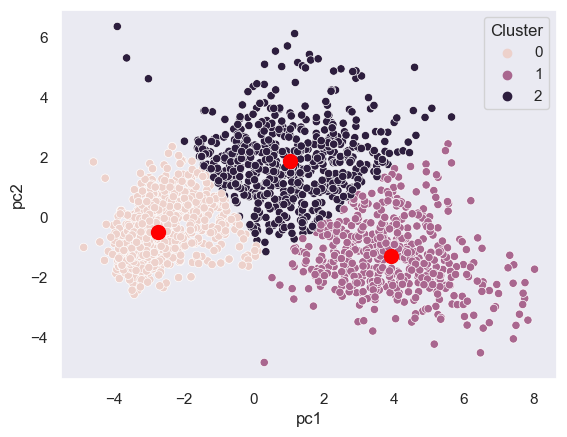

In [45]:
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue='Cluster')
plt.scatter(data=feature_centroid, x='pc1', y='pc2', c='red', s=100) 

**Elbow Method**

27352.597652973378
10839.524449977293
5526.349692637264
4544.3713386028085
3800.513510360427
3104.8736733565206
2707.3373710337573
2389.564682065893
2148.2618675893063
1933.8504076244176
1774.0477400445889


<AxesSubplot:xlabel='Jumlah n - Cluster (Centroid)', ylabel='Inertia (Total jarak setiap titik ke Centroid)'>

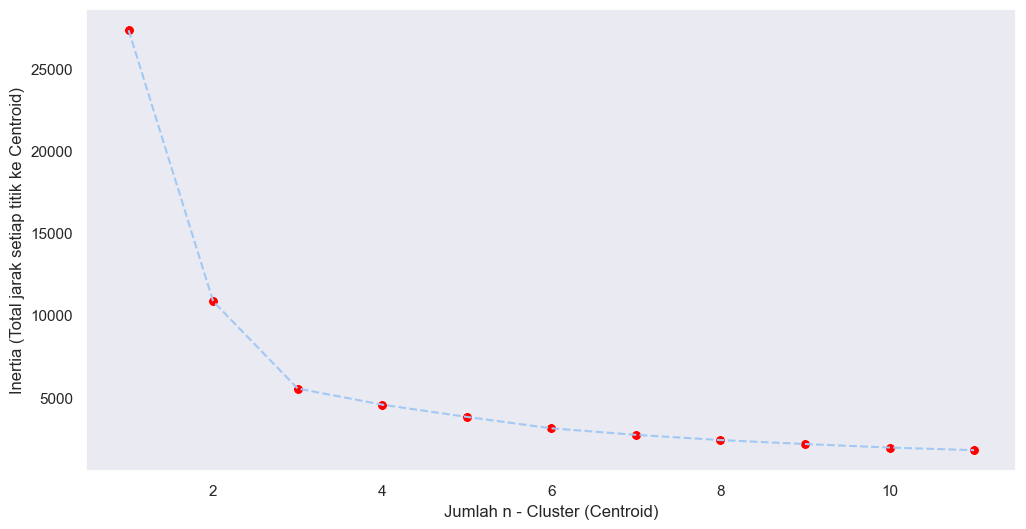

In [46]:
X_for_elbow =  df_pca.copy()
inertia = []
for i in range(1,12):
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(X_for_elbow)
    print(km.inertia_)
    inertia.append(km.inertia_)
plt.figure(figsize=(12,6))
sns.lineplot(x=np.arange(1,12), y=inertia,  linestyle='--')
plt.xlabel('Jumlah n - Cluster (Centroid)')
plt.ylabel('Inertia (Total jarak setiap titik ke Centroid)')
sns.scatterplot(x=range(1, 12), y=inertia, s=50, color='red')

**Silhouette Evaluation**

In [47]:
X_std = df_pca[['pc1','pc2']]
X_std.head()

,pc1,pc2
0,4.803080,0.117135
1,-3.008770,-0.346632
2,1.837197,-0.178766
3,-3.135972,-1.101758
4,-0.067158,0.826767


For n_clusters = 2 The average silhouette_score is : 0.5434355038820368
For n_clusters = 3 The average silhouette_score is : 0.5368633994272684
For n_clusters = 4 The average silhouette_score is : 0.470618758984153
For n_clusters = 5 The average silhouette_score is : 0.43732420211420187


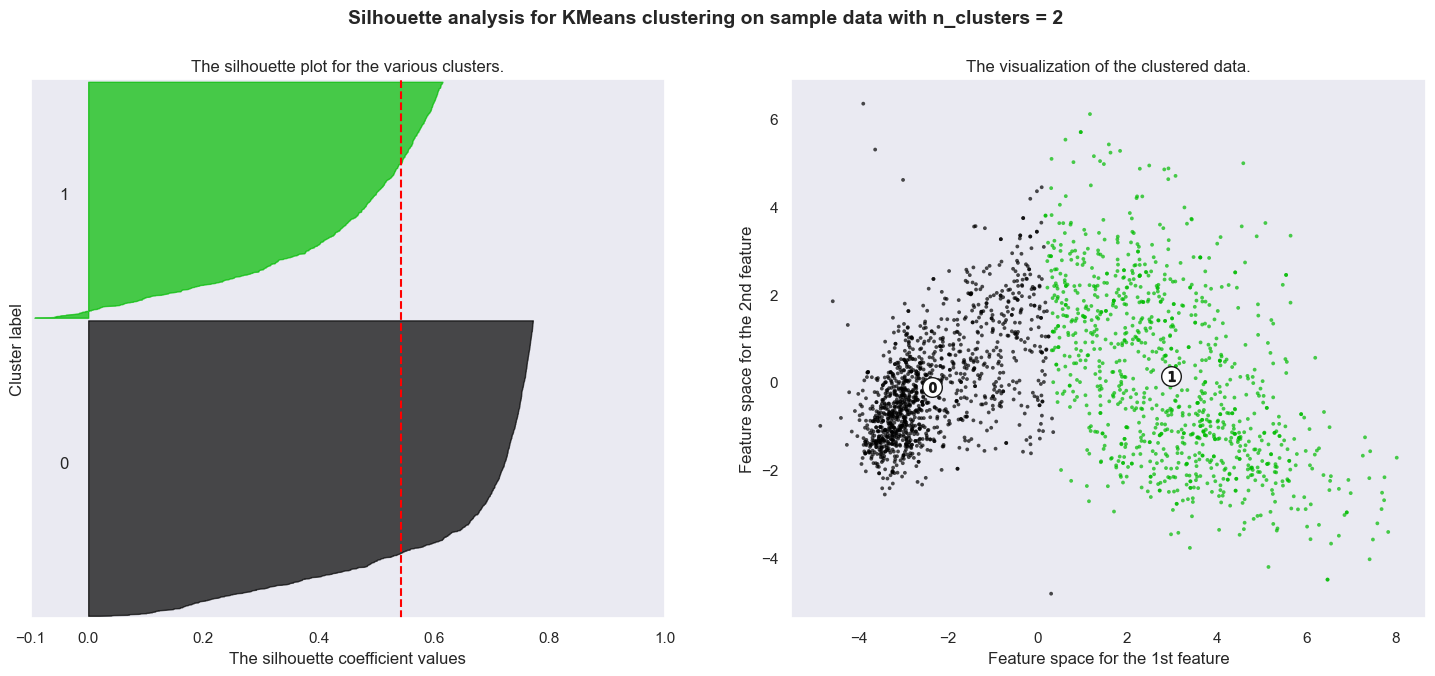

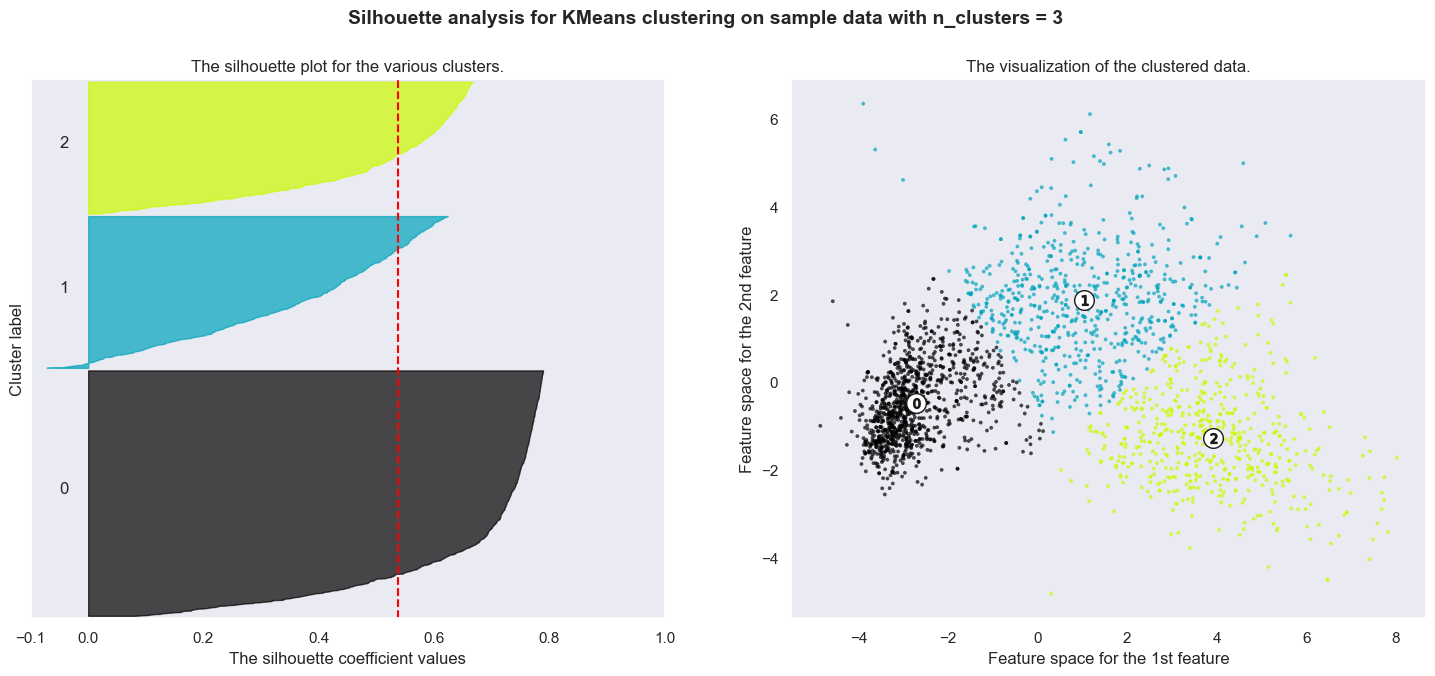

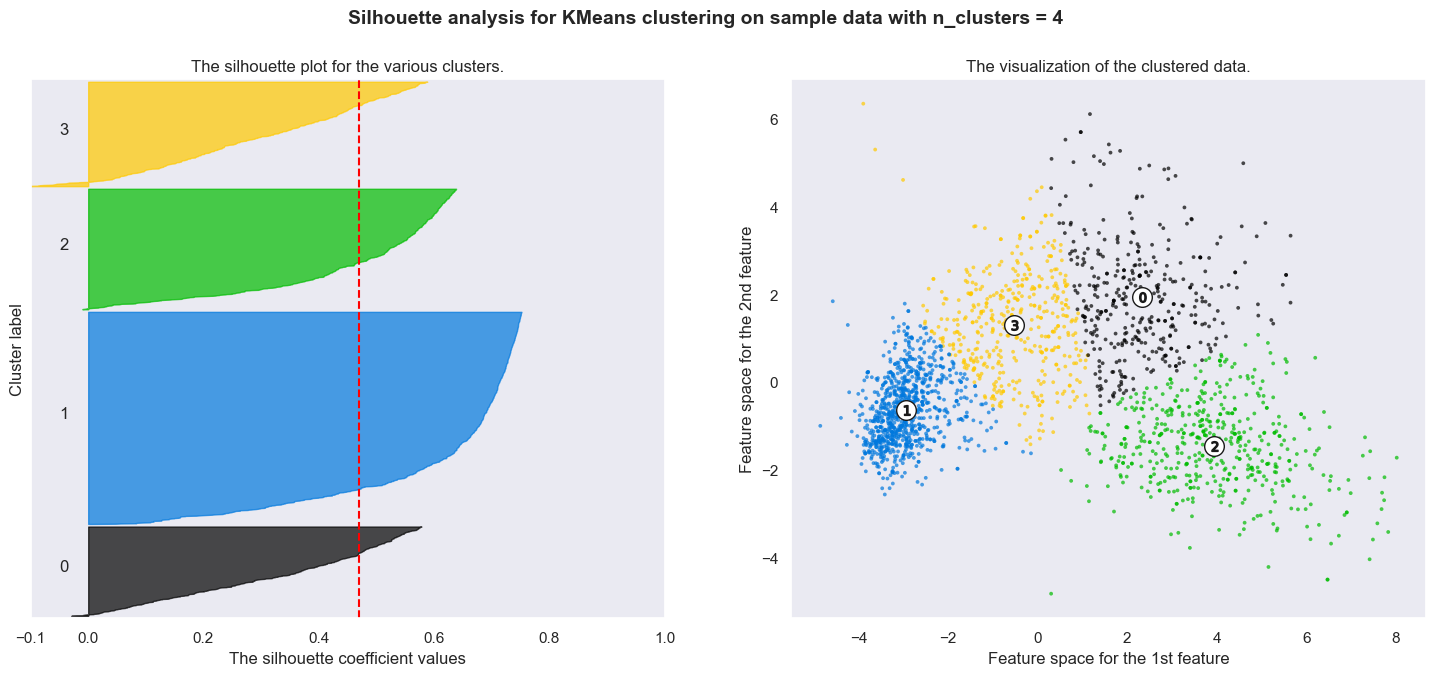

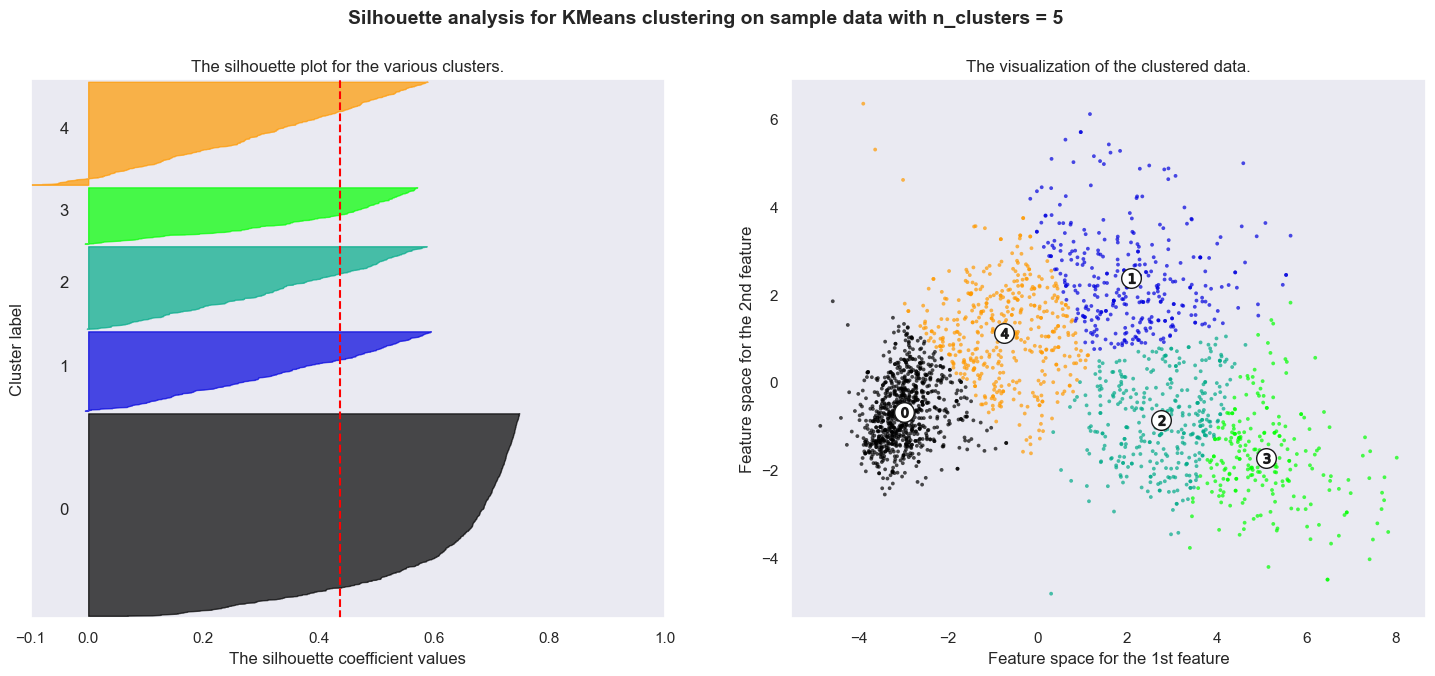

In [48]:
# Silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data=X_std, x='pc1',y='pc2' , marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Summary Model**
- Berdasarkan Elbow Method jumlah cluster optimal ditunjukkan oleh ratio penurunan inertia terendah, yakni pada jumlah cluster 3.

- Silhouette score mengukur seberapa dekat titik data berada pada klaster yang ditugaskan kepadanya dibandingkan dengan klaster lainnya. Nilai positif 0.53  pada jumlah 3 cluster menunjukkan bahwa titik data ditempatkan dengan benar dalam klaster mereka dan memiliki jarak yang lebih dekat dengan klaster mereka daripada klaster lainnya. Sehingga jumlah cluster 3 paling optimal.


## Interpretasi Hasil
1. Bagaimana efek jika kita menargetkan marketing campaign terhadap spesifik suatu cluster untuk meningkatkan revenue & conversion rate
2. Mengambil Rekomendasi Keputusan, kepada customer yang berpotensial agar mereka lebih rajin bertransaksi
   
TASK :
1. Melakukan Interpretasi terhadap hasil cluster
2. Memilih cluster yang paling tepat untuk melakukan re - targeting selanjutnya
3. Menganalisis rekomendasi dari cluster yang potensial dan tidak potensial. Bagaimana behavior dari cluster lainnya?

4 kategori :
- High Spender  : memiliki jumlah customer yg sedikit, namun memiliki conversion rate tertinggi dan Income dan Total Spend terbesar (Target). Monitor transaksi dan retency. Fokus meningkatkan layanan
- Mid Spender   : memiliki pendapatan dan pengeluaran terbesar kedua. Jarang visit web, tapi sering merespon campaign. Punya penggunaan promo terbesar. fokus cari cara agar kelompok ini tidak menghabiskan cupon discount. Rekomendasi : memberikan rekomendasi lebih personal bagaimana dapat mengoptimasi promosi.
- Low Spender   : hampir sama dengan mid spender
- Risk of Churn : punya angka pendapatan terendah, dan total spending terkecil. tetapi paling sering mengunjungi website. Namun Jarang transaksi. Dan tidak banyak merespon campaign. Lihat behavior mereka terhadap sebuah product (apakah product kurang sesuai, atau harga terlalu mahal untuk mereka?)

In [53]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_category,Population,Total_cost,Total_acc_campaign,Conversion_rate,Total_purchases,Cluster
0,5524,1957,2,0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,Lansia(56-75),1,1617000,1,21.57,32,1
1,2174,1954,2,0,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,Lansia(56-75),3,27000,0,4.40,11,0


In [97]:
df['Cluster'] = cluster_pca_label
df_summary = df[['ID','Recency','Total_purchases','Total_cost','Conversion_rate','Income','NumWebVisitsMonth','Total_acc_campaign','Cluster']]

df_summary = df_summary.groupby('Cluster').agg({
    'ID' : 'count',
    'Recency'	: 'mean',
    'Total_purchases' : 'mean',
    'Total_cost' : 'mean',
    'Conversion_rate' : 'mean',
    'Income' : 'mean',
    'NumWebVisitsMonth' : 'mean',
    'Total_acc_campaign' : 'mean'
}).reset_index()
df_summary['Cluster_name'] = ['Risk Of Churn','Potensial','Mid Spender']
df_summary.columns = ['Cluster','Total_customer','Recency','Total_purchases','Total_cost',
                      'Conversion_rate','Income','NumWebVisitsMonth','Avg_acc_campaign','Cluster_name']
df_summary

,Cluster,Total_customer,Recency,Total_purchases,Total_cost,Conversion_rate,Income,NumWebVisitsMonth,Avg_acc_campaign,Cluster_name
0,0,1033,49.355276,14.178122,9.779090e+04,5.187406,3.490084e+07,6.356244,0.168441,Risk Of Churn
1,1,555,49.809009,23.394595,1.393773e+06,16.404306,7.608833e+07,2.780180,1.046847,Potensial
2,2,639,48.122066,27.037559,7.304272e+05,14.961800,5.734069e+07,5.910798,0.374022,Mid Spender


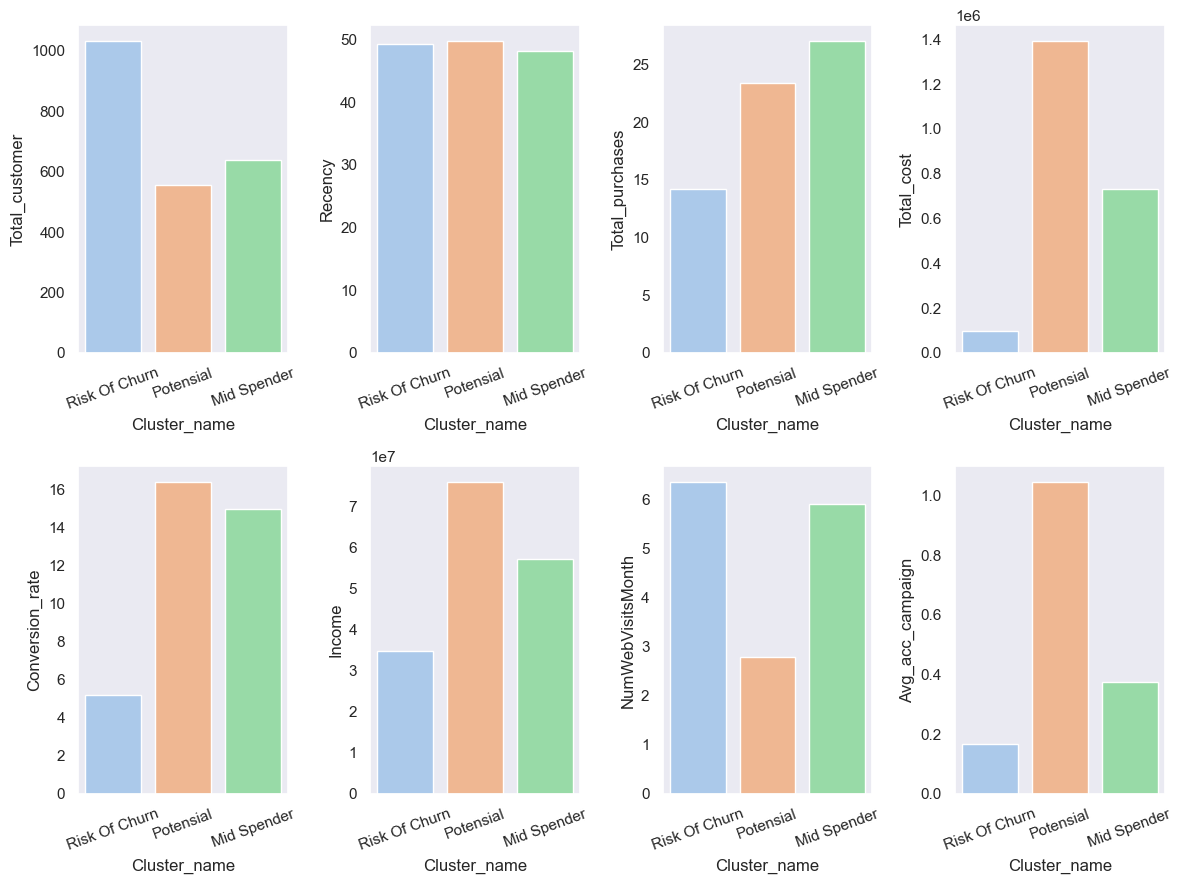

In [99]:
kolom = ['Total_customer','Recency','Total_purchases','Total_cost','Conversion_rate',
 'Income','NumWebVisitsMonth','Avg_acc_campaign']

plt.figure(figsize=(12,9))
for i in range(len(kolom)):
    plt.subplot(2,4,i+1)
    sns.barplot(data=df_summary, x='Cluster_name', y=kolom[i])
    plt.xticks(rotation = 20)
plt.tight_layout()

<AxesSubplot:xlabel='Recency', ylabel='Conversion_rate'>

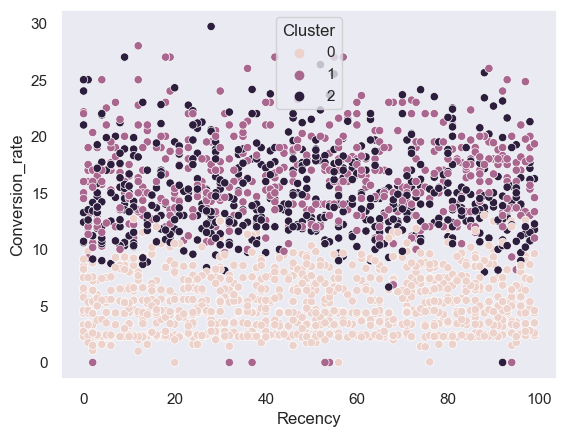

In [71]:
sns.scatterplot(data=df, x='Recency', y='Conversion_rate', hue='Cluster')